In [1]:
!pip install ucimlrepo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5520 - loss: 1.5703 - val_accuracy: 0.8560 - val_loss: 0.4652
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8766 - loss: 0.4099 - val_accuracy: 0.9080 - val_loss: 0.2767
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9178 - loss: 0.2545 - val_accuracy: 0.9212 - val_loss: 0.2487
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9358 - loss: 0.1959 - val_accuracy: 0.9390 - val_loss: 0.1922
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9487 - loss: 0.1530 - val_accuracy: 0.9390 - val_loss: 0.1939
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9557 - loss: 0.1369 - val_accuracy: 0.9433 - val_loss: 0.1750
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9573 - loss: 0.1293 - val_accuracy: 0.9427 - val_loss: 0.1695
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9679 - loss: 0.0924 - val_accu

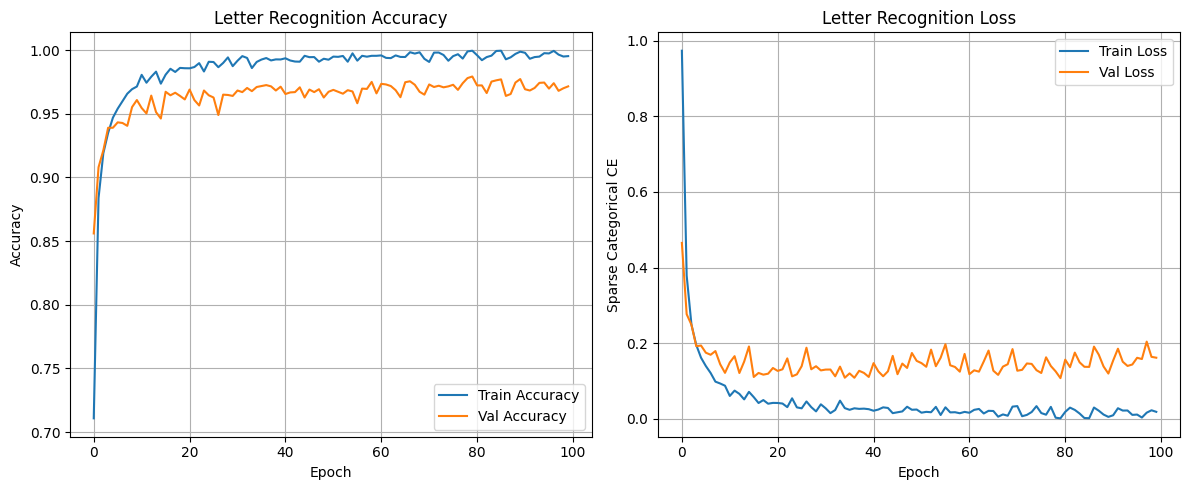

In [4]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

# 1) Load Letter Recognition data
letters = fetch_ucirepo(id=59)
X_raw = letters.data.features   # pandas DataFrame, shape (20000, 16)
y_raw = letters.data.targets    # Series of 'A'–'Z'

# 2) Encode labels as integers 0–25
y_series = y_raw.iloc[:, 0]
label_map = {chr(ord('A') + i): i for i in range(26)}
y = y_series.map(label_map).astype(int).values

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 5) Build a similarly large MLP for 26-way classification
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64,  activation='relu'),
    Dense(26,  activation='softmax')   # 26 output units
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # integer labels → one-hot inside
    metrics=['accuracy']
)

# 6) Train and time it
start = time.time()
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Training time: {end - start:.1f} seconds")

# 7) Plot accuracy & loss curves
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],  label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.title('Letter Recognition Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],      label='Train Loss')
plt.plot(history.history['val_loss'],  label='Val Loss')
plt.title('Letter Recognition Loss')
plt.xlabel('Epoch')
plt.ylabel('Sparse Categorical CE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
